In [30]:
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import load_model

In [22]:
X = np.linspace(-1,1,200)
np.random.shuffle(X)
Y = 0.5*X + 2+np.random.normal(0,0.05,(200,))

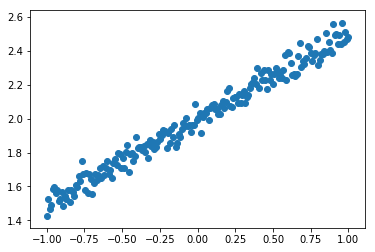

In [23]:
%matplotlib inline
plt.scatter(X, Y)

In [24]:
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

In [25]:
model = Sequential()
model.add(Dense(units=1, input_dim = 1 ))

model.compile(loss = 'mse', optimizer = 'sgd') 

In [26]:
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print("train cost:", cost)

train cost: 4.19465
train cost: 0.134564
train cost: 0.0196469
train cost: 0.00629634


40/40 [==============================] - 0s 786us/step
test cost: 0.00588000472635


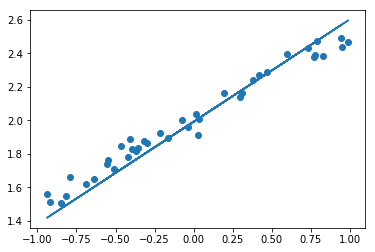

In [27]:
cost = model.evaluate(X_test, Y_test, batch_size=40)
print("test cost:", cost)
W, b = model.layers[0].get_weights()
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)


In [28]:
print(W, b)

[[ 0.61191732]] [ 1.9915086]


In [29]:
print('test before save: ', model.predict(X_test[0:2]))
model.save('my_model.h5')
del model

test before save:  [[ 1.76703644]
 [ 1.74243677]]


In [31]:
model = load_model('my_model.h5')
print('test after save: ', model.predict(X_test[0:2]))

test after save:  [[ 1.76703644]
 [ 1.74243677]]
